## Google Data Analytics Certificate: Bellabeat Case Study

### Introduction:

#### Bellabeat is a high-tech manufacturer of health-products for women. Cofounder and Chief Creative Officer, Urška Sršen, has asked the Bellabeat marketing analytics team to analyze smart device fitness data from their users to potentially open new opportunities for growth.

#### This project will be conducted using the six phases taught in the Google Data Analytics Certificate program:
1) Ask

2) Prepare

3) Process

4) Analyze

5) Share

6) Act

### 1) Ask

#### Business Task:

#### What patterns and trends are found in smart device usage that apply to Bellabeat's customers, and how will these trends effect future marketing strategies?


#### Key Project Stakeholders:

* Urška Sršen: Bellabeat Cofounder and Chief Creative Officer
* Sando Mur: Bellabeat Cofounder and Mathmetician; key member of Executive Team
* Bellabeat Marketing Analytics Team

#### Products:

* Bellabeat App: The Bellabeat App helps user to track their activity, sleep, stress, menstrual cycle, and mindfulness habits in order to create healthy routines. The app connects the users to Bellabeat's wellness products.
* Leaf: Bellabeat's signature wellness tracker, can be worn as a necklace, bracelet, or clip.
* Time: Smart watch wellness tracker.
* Spring: Smart water bottle which tracks users' water intake.
* Bellabeat Membership: Subscription-based membership providing 24/7 access to personallized guidance on wellness goals.



### 2) Prepare
#### About the Data
##### 
* Data for this analysis is the Kaggle dataset, FitBit Fitness Tracker Data, made available through Mobius.
* Data is made up of 18 csv files storing fitness tracking data from Bellabeat's customers.
* Small sample size and lack of demographic data may not accurately reflect the population.
* Data collection time period is only 2 months, may result in bias of seasonal trends.

### 3) Process

#### This analysis will be conducted through R programming.


#### 3.1 Import Data

#### For this project we'll be using the following packages in R:

* tidyverse
* ggplot2
* dplyr
* lubridate

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




#### 3.2 Preview Data

#### Import Data and change table names

In [2]:
library(readr)
Daily_Activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
Sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
Intensity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
Weight <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

glimpse(Daily_Activity)
glimpse(Sleep)
glimpse(Intensity)
glimpse(Weight)

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column spec

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

#### After viewing the first few rows of data we find the data in the Intensity table is very similar to the Daily_Activity table, we'll verify if this is the case.

In [3]:
Intensity %in% Daily_Activity
Sleep %in% Daily_Activity

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] FALSE FALSE FALSE FALSE FALSE

#### Now that we've confirmed the Intensity table is included in the Daily_Activity table, we can disregard the Intensity table.

#### 3.3 Clean Data

#### Count distinct values and find duplicates.

In [4]:
n_distinct(Daily_Activity$Id)
n_distinct(Sleep$Id)
n_distinct(Weight$Id)

[1] 33

[1] 24

[1] 8

In [5]:
sum(duplicated(Daily_Activity))
sum(duplicated(Sleep))
sum(duplicated(Weight))

[1] 0

[1] 3

[1] 0

#### Remove duplicates from the Sleep table and verifying they've been removed.

In [6]:
Sleep <- unique(Sleep)
sum(duplicated(Sleep))

[1] 0

#### Check column names

In [7]:
names(Daily_Activity)
names(Sleep)
names(Weight)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

#### Before we merge tables we'll need to make sure all of the date columns are named "date" and put into the same POSIXct format.

In [8]:
head(Daily_Activity$ActivityDate)
head(Sleep$SleepDay)
head(Weight$Date)

[1] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" "4/16/2016" "4/17/2016"

[1] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM"
[4] "4/16/2016 12:00:00 AM" "4/17/2016 12:00:00 AM" "4/19/2016 12:00:00 AM"

[1] "5/2/2016 11:59:59 PM"  "5/3/2016 11:59:59 PM"  "4/13/2016 1:08:52 AM" 
[4] "4/21/2016 11:59:59 PM" "5/12/2016 11:59:59 PM" "4/17/2016 11:59:59 PM"

In [9]:
class(Daily_Activity$ActivityDate)
class(Sleep$SleepDay)
class(Weight$Date)

[1] "character"

[1] "character"

[1] "character"

In [10]:
Daily_Activity$ActivityDate=as.POSIXct(Daily_Activity$ActivityDate, format="%m/%d/%Y")
head(Daily_Activity)
class(Daily_Activity$ActivityDate)

Sleep$SleepDay=as.POSIXct(Sleep$SleepDay, format="%m/%d/%Y")
head(Sleep)
class(Sleep$SleepDay)

Weight$Date=as.POSIXct(Weight$Date, format="%m/%d/%Y")
head(Weight)
class(Weight$Date)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "POSIXct" "POSIXt"

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


[1] "POSIXct" "POSIXt"

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12


[1] "POSIXct" "POSIXt"

In [11]:
Daily_Activity <- rename(Daily_Activity, date=ActivityDate)
Sleep <- rename(Sleep, date=SleepDay)
Weight <- rename(Weight, date=Date)

#### Now that the dates are in the same POSIXct format, we can go ahead and merge the 'Daily_Activity' and 'Sleep' tables together into a new table, 'Daily_Tracking', which we will focus on for our analysis.


In [12]:
Daily_Tracking <- merge(Daily_Activity, Sleep, by=c('Id','date'))
glimpse(Daily_Tracking)
glimpse(Weight)

Rows: 410
Columns: 18
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ TotalSteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ TotalDistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ FairlyActiveMinutes      <dbl> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ LightlyActiveMin

### 4/5) Analyze and Share

#### Summaries and identifying attributes between variables

In [13]:
#summary of tables

Daily_Tracking %>%
    select(TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes,
            SedentaryMinutes, Calories, TotalMinutesAsleep) %>%
    summary()

Weight %>%
    select(WeightKg, Fat, BMI) %>%
    summary()

   TotalSteps    VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :   17   Min.   :  0.00    Min.   :  0.00      Min.   :  2.0       
 1st Qu.: 5189   1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:158.0       
 Median : 8913   Median :  9.00    Median : 11.00      Median :208.0       
 Mean   : 8515   Mean   : 25.05    Mean   : 17.92      Mean   :216.5       
 3rd Qu.:11370   3rd Qu.: 38.00    3rd Qu.: 26.75      3rd Qu.:263.0       
 Max.   :22770   Max.   :210.00    Max.   :143.00      Max.   :518.0       
 SedentaryMinutes    Calories    TotalMinutesAsleep
 Min.   :   0.0   Min.   : 257   Min.   : 58.0     
 1st Qu.: 631.2   1st Qu.:1841   1st Qu.:361.0     
 Median : 717.0   Median :2207   Median :432.5     
 Mean   : 712.1   Mean   :2389   Mean   :419.2     
 3rd Qu.: 782.8   3rd Qu.:2920   3rd Qu.:490.0     
 Max.   :1265.0   Max.   :4900   Max.   :796.0     

    WeightKg           Fat             BMI       
 Min.   : 52.60   Min.   :22.00   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:22.75   1st Qu.:23.96  
 Median : 62.50   Median :23.50   Median :24.39  
 Mean   : 72.04   Mean   :23.50   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:24.25   3rd Qu.:25.56  
 Max.   :133.50   Max.   :25.00   Max.   :47.54  
                  NA's   :65                     

#### Insights from these summaries include:
* The average user sleeps for around 7 hours
* On average, users spend less than 30 minutes being very active or fairly active
* Users spend more time on sedentary activity than sleep
* The average BMI of users is considered overweight according to the CDC (Source link: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

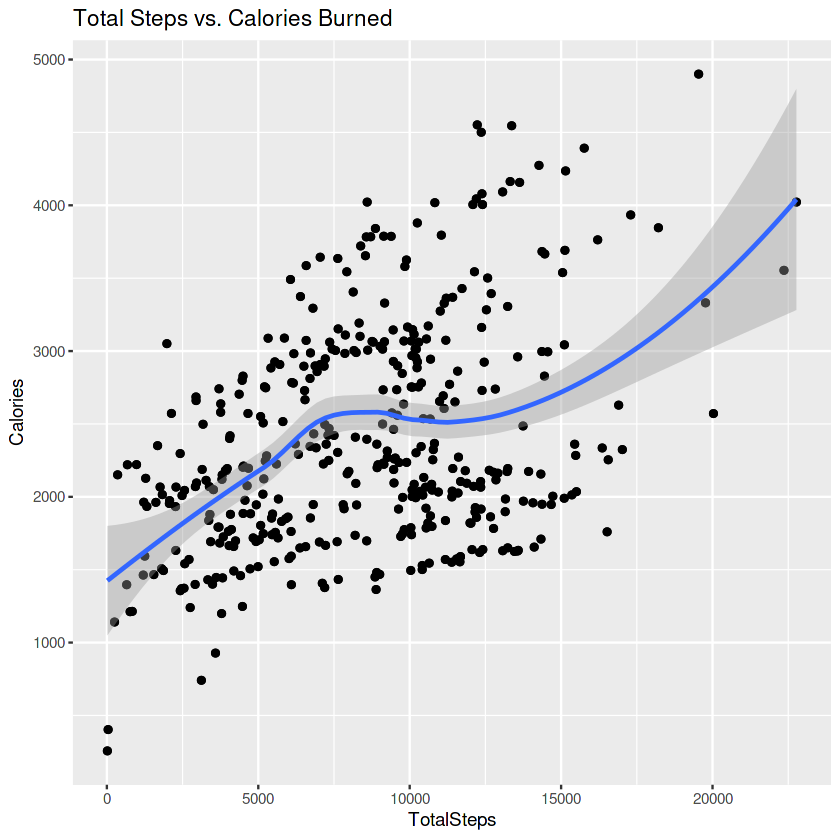

In [14]:
#visualize relationship between steps taken and calories burned

ggplot(data=Daily_Tracking, mapping = aes(x=TotalSteps,y=Calories)) +    
geom_point() + geom_jitter() +
geom_smooth(method=loess, formula = y ~ x) +
labs(title="Total Steps vs. Calories Burned")



#### As expected we can see a positive correlation between the amount of steps taken to calories burned by users on average.

#### We can also note there are users who take less steps per day and still burn similar calories compared to users taking more than 10,000 steps per day. To gain a clearer picture of how daily activity effects calories burned we will take a look at each activity level.

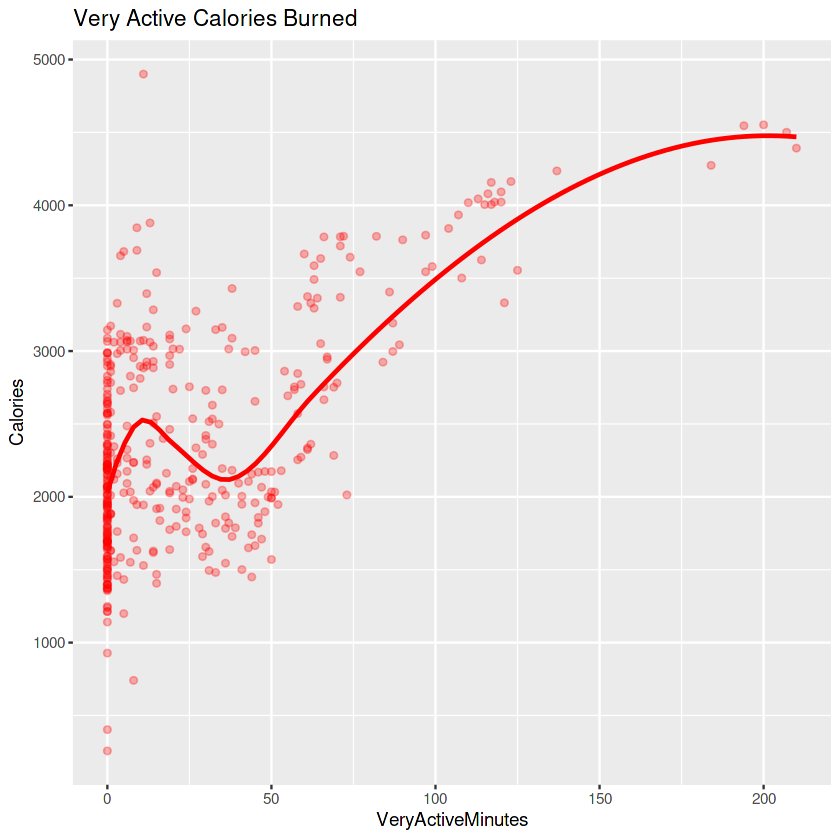

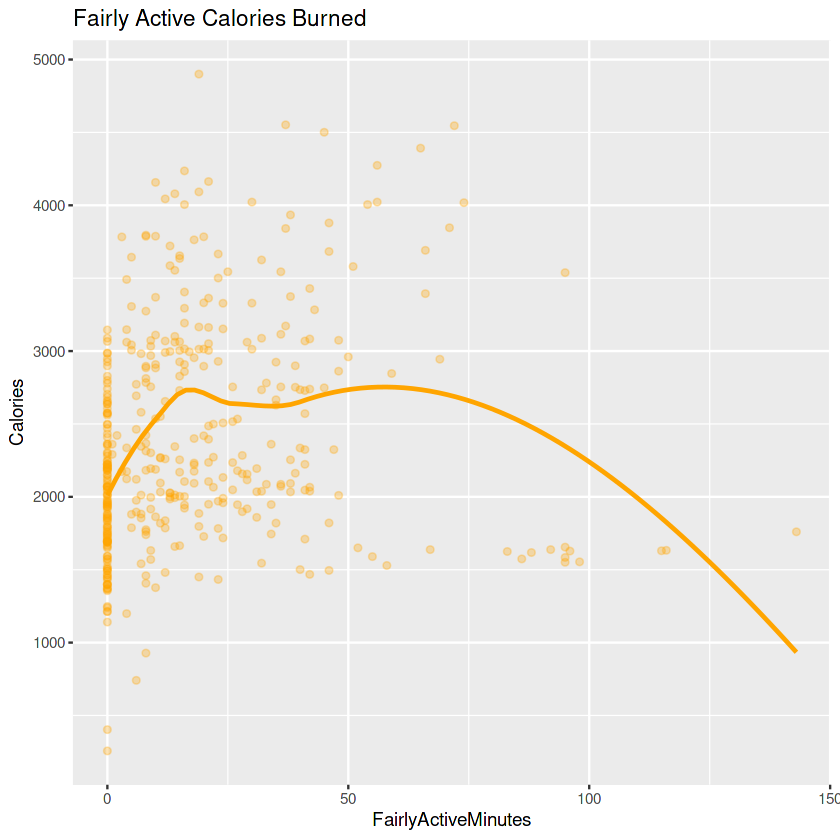

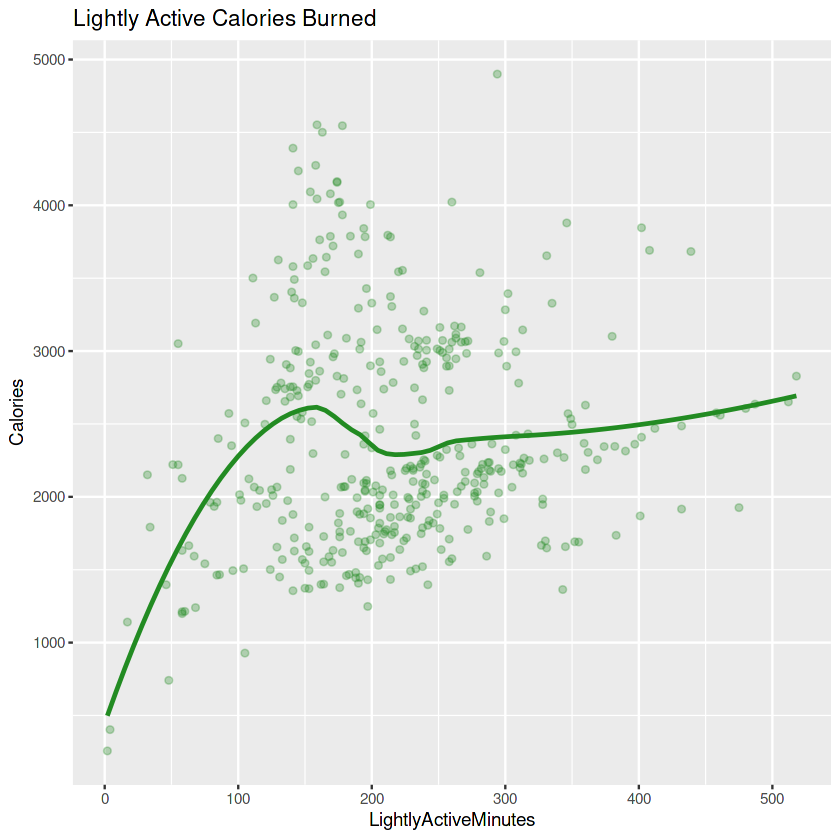

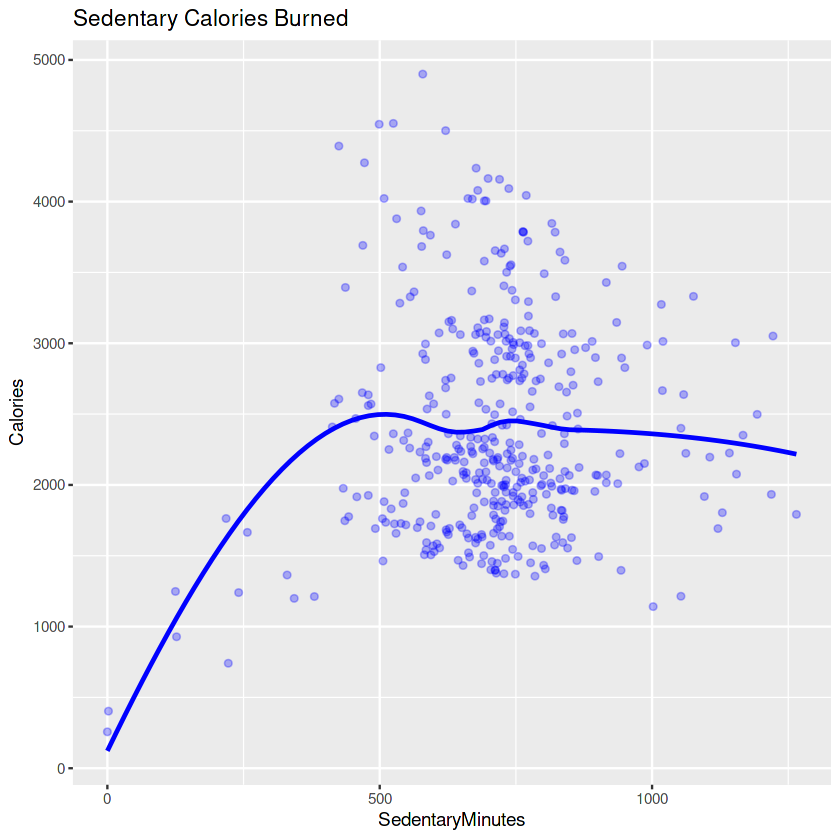

In [15]:
ggplot(data = Daily_Tracking) +
geom_point(mapping=aes(x=VeryActiveMinutes, y=Calories), color = "red", alpha = 0.3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=VeryActiveMinutes, y=Calories, color=VeryActiveMinutes), color = "red", se = FALSE) +
labs(title="Very Active Calories Burned")

ggplot(data = Daily_Tracking) +
geom_point(mapping=aes(x=FairlyActiveMinutes, y=Calories), color = "orange", alpha = 0.3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=FairlyActiveMinutes, y=Calories, color=FairlyActiveMinutes), color = "orange", se = FALSE) +
labs(title="Fairly Active Calories Burned")

ggplot(data = Daily_Tracking) +
geom_point(mapping=aes(x=LightlyActiveMinutes, y=Calories), color = "forest green", alpha = 0.3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=LightlyActiveMinutes, y=Calories, color=LightlyActiveMinutes), color = "forest green", se = FALSE) +
labs(title="Lightly Active Calories Burned")

ggplot(data = Daily_Tracking) +
geom_point(mapping=aes(x=SedentaryMinutes, y=Calories), color = "blue", alpha = 0.3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=SedentaryMinutes, y=Calories, color=SedentaryMinutes), color = "blue", se = FALSE) +
labs(title="Sedentary Calories Burned")


#### From these we can see that the amount of calories burned correlates closely with minutes spent being very active.

#### Let's also see if there are any trends in which days of the week users tend to be more or less active.

In [16]:
#create weekday column

Daily_Tracking <- Daily_Tracking %>% add_column(weekdays(Daily_Tracking$date)) %>% rename(Weekday = 'weekdays(Daily_Tracking$date)')

In [17]:
#group activity level by weekdays

weekdayact <- Daily_Tracking %>% group_by(Weekday) %>%
summarise('Very'=mean(VeryActiveMinutes), 'Fair'=mean(FairlyActiveMinutes), 'Light'=mean(LightlyActiveMinutes), 'Sedentary'=mean(SedentaryMinutes))
head(weekdayact)

Weekday,Very,Fair,Light,Sedentary
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Friday,21.15789,14.57895,222.6842,743.0877
Monday,30.71739,19.08696,222.3696,718.4130
Saturday,27.56140,22.71930,246.7719,680.4386
Sunday,22.14545,16.76364,200.0364,687.6364
Thursday,22.85938,15.85938,202.9375,698.3750
Tuesday,30.61538,20.04615,216.5846,740.0462


In [18]:
#remove sedentary column to compare active minutes

weekdayact <- subset(weekdayact, select = -Sedentary)

In [19]:
#change table format from wide to long with column names as variables

WeekDayAct <- weekdayact %>%
    pivot_longer(!Weekday, names_to= "ActLevel")

head(WeekDayAct)

Weekday,ActLevel,value
<chr>,<chr>,<dbl>
Friday,Very,21.15789
Friday,Fair,14.57895
Friday,Light,222.68421
Monday,Very,30.71739
Monday,Fair,19.08696
Monday,Light,222.36957


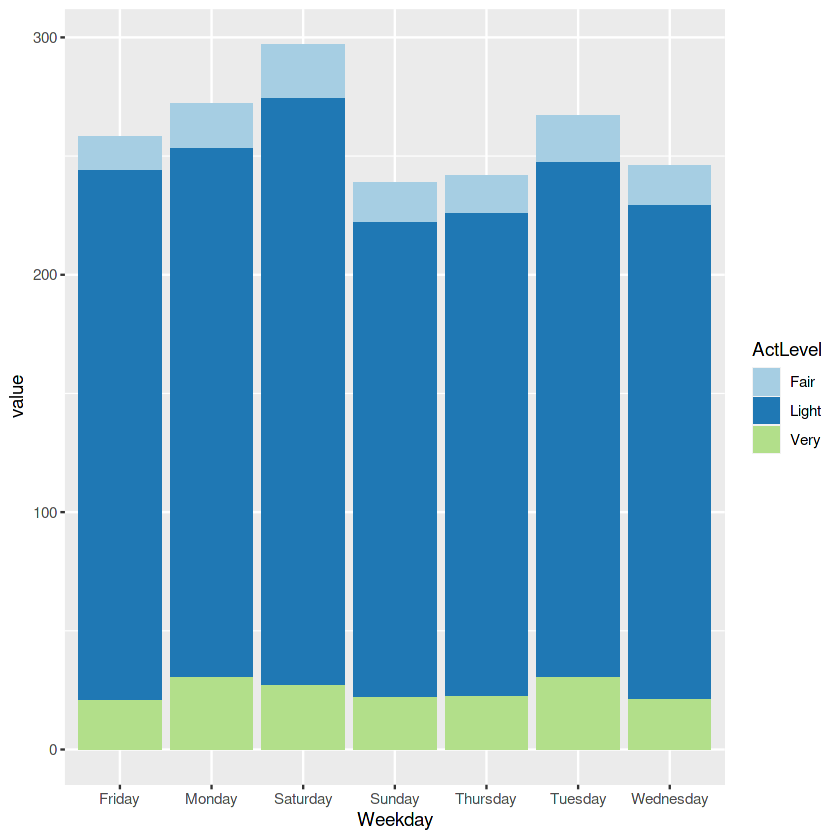

In [20]:
#visualize activity levels for each weekday

ggplot(data =WeekDayAct, aes(x =Weekday, y =value, fill =ActLevel)) +
geom_bar(position="stack", stat="identity") +
scale_fill_brewer(palette ="Paired")

#### Insights from this visual include:
* Saturday has the highest overall activity level
* Days with the least activity are Sunday, Wednesday and Thursday
* Users spend most of their activity time being lightly active

### 6) Act


#### Key Findings:
* Taking more steps each day leads to users burning more calories
* Light Activity such as walking or jogging is popular among users
* Users who desire a higher amount of calories burned can increase the time spent being Very Active each day
* Adding consistency to weekday activity can lead to users reducing and keeping their BMI within a healthy range

#### Conclusion/Recommendations:
* Create daily goals for users to spend at least 30 minutes in Very Active activity
* Send out push notifications each Sunday, Wednesday and Thursday for users to increase steps taken
* Reward users who meet their activity goals each week to encourage a positive mindset in creating healthy habits